In [44]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import warnings #to remove the warnings
import random
import sys
sys.path.append('../../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from subsampleData import subsample
from models import trainModels
from genFillNulls import *
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler





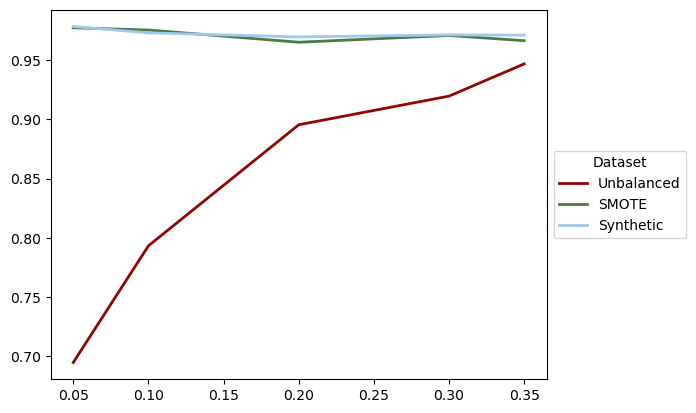

In [45]:
'''
WBC
-------
RAW DATA
[0.9456638262506314, 0.9537830712303423, 0.9519177506340186, 0.9313956713120032, 0.9519177506340186] -> 0.9469
[0.9106121575865735, 0.925621054552089, 0.9235881155881156, 0.9086864235769785, 0.9301701261701263] -> 0.9197
[0.8770965952430483, 0.9058167812579578, 0.9070680712476378, 0.8749210369953403, 0.912400028591979] -> 0.8955
[0.7909973359973359, 0.8516233766233766, 0.7872222222222222, 0.741919191919192, 0.7947979797979798] -> 0.7933
[0.7006349206349206, 0.6666666666666667, 0.75, 0.6333333333333333, 0.7233333333333334] -> 0.6948
SMOTE DATA
[0.9644141871301887, 0.9660464651519189, 0.9708025595169572, 0.9604697142214047, 0.9707497053943357] -> 0.9665
[0.9611902866714788, 0.9718002553647652, 0.9765718464350609, 0.9698234273625375, 0.975352163442051] -> 0.9709
[0.9494955105164327, 0.9684521860248323, 0.9722259052351871, 0.9672028290277032, 0.9684521860248323] -> 0.9652
[0.9658738540149248, 0.9786683142366446, 0.9755480694850336, 0.9787420964356093, 0.9786683142366446] -> 0.9755
[0.9680770803315992, 0.9821925681694393, 0.9790150880214121, 0.9764449121060143, 0.9810692661840685] -> 0.9774
Synthetic DATA
[0.9702172486517755, 0.978508764324731, 0.976391764893212, 0.9532127158959771, 0.9774906659921131] -> 0.9712
[0.9725292640279999, 0.9752294150384948, 0.977638064143686, 0.956567527331275, 0.9752294150384948] -> 0.9714
[0.9726311781366965, 0.9764289485686654, 0.978889966341938, 0.9442572500132614, 0.9764536429753822] -> 0.9697
[0.9749558584931475, 0.9809846275785127, 0.9821823620446128, 0.94507749808678, 0.9821823620446128] -> 0.9731
[0.9772022263574929, 0.9800216383556176, 0.982294384766295, 0.9706369562549337, 0.982294384766295] -> 0.9785
'''
raw_wbc = [.9469, 0.9197, 0.8955, 0.7933, 0.6948]
smote_wbc = [.9665, 0.9709, 0.9652, 0.9755, 0.9774]
syn_wbc = [.9712, 0.9714, 0.9697, 0.9731, 0.9785]

wbc_x_vals = [0.35, 0.3, 0.2, 0.1, 0.05]

plt.plot(wbc_x_vals, raw_wbc,  label='Unbalanced', color='#900603', linewidth=2)
plt.plot(wbc_x_vals, smote_wbc, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(wbc_x_vals, syn_wbc, label='Synthetic', color='#9DCAEB', linewidth=2)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

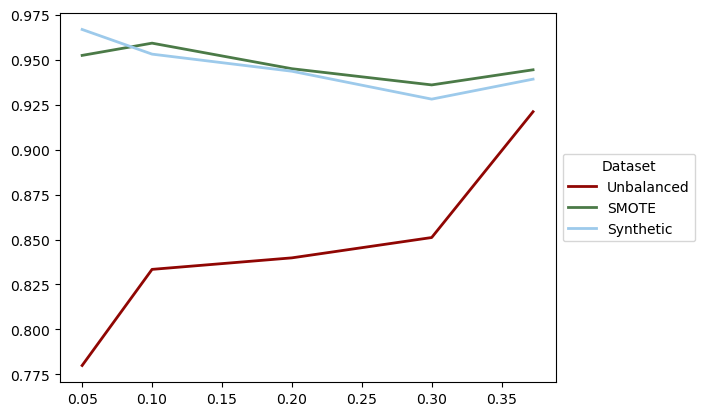

In [46]:
'''
WDBC
-------
RAW DATA
[0.9122090677629979, 0.9180165958072933, 0.9390420606251875, 0.9037729964676375, 0.9319940619033076] -> 0.921
[0.7896810207336523, 0.8551082251082252, 0.8966836062488236, 0.8551540247192421, 0.858723725534871] -> 0.8511
[0.7709279609279609, 0.83753663003663, 0.8876556776556777, 0.8360347985347986, 0.8667932067932067] -> 0.8398
[0.7928571428571429, 0.7814285714285714, 0.9085714285714286, 0.8388095238095238, 0.8454761904761904] -> 0.8334
[0.76, 0.78, 0.8666666666666668, 0.6799999999999999, 0.8133333333333332] -> 0.78
SMOTE DATA
[0.9214178963853182, 0.9400344751241334, 0.9552292874446069, 0.9464674542584012, 0.9583191411007629] -> 0.9443
[0.8473811042550791, 0.9537006190169072, 0.9619750430704055, 0.9567351432002381, 0.9595107736250158] -> 0.9359
[0.8516792480211842, 0.9617238899427163, 0.9665005202551026, 0.9751834218938213, 0.9695345235003818] -> 0.9449
[0.9114155272761544, 0.9579899438996489, 0.97635457077089, 0.9864438662084811, 0.9634371994639988] -> 0.9591
[0.8988345810546517, 0.9551781001752454, 0.9738028588445504, 0.9724109166082926, 0.9612869492013241] -> 0.9523
Synthetic DATA
[0.949334831171958, 0.9220777822726036, 0.9492518743023263, 0.9248132216811211, 0.949969095717375] -> 0.9391
[0.9418073638064763, 0.8872302447301547, 0.9313681302521661, 0.9332708759941291, 0.9462815623648266] -> 0.928
[0.9626893403060874, 0.8897906883987522, 0.9450402439419202, 0.9607580156455497, 0.9593658279490922] -> 0.9435
[0.985352463473243, 0.9181798902397352, 0.9791264711557013, 0.9022304982663748, 0.9801576582784376] -> 0.953
[0.9871525689187501, 0.918772036655905, 0.9810983330558114, 0.9594622518788061, 0.9869806859969878] -> 0.9667
'''
raw_wdbc = [.921, 0.8511, 0.8398, 0.8334, 0.78]
smote_wdbc = [.9443, 0.9359, 0.9449, 0.9591, 0.9523]
syn_wdbc = [.9391, 0.928, 0.9435, 0.953, 0.9667]

wdbc_x_vals = [0.3725, 0.3, 0.2, 0.1, 0.05]


plt.plot(wdbc_x_vals, raw_wdbc,  label='Unbalanced', color='#900603', linewidth=2)
plt.plot(wdbc_x_vals, smote_wdbc, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(wdbc_x_vals, syn_wdbc, label='Synthetic', color='#9DCAEB', linewidth=2)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

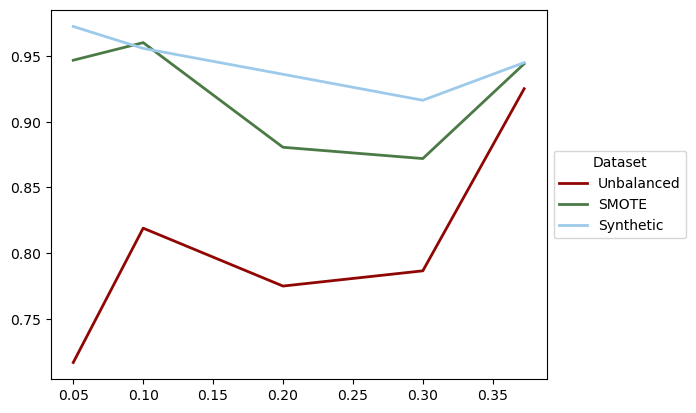

In [47]:
'''
WDBC_Stripped
-------
RAW DATA
[0.8992564070471047, 0.9300778083704913, 0.9443171443795381, 0.9012426769309856, 0.9510689301245172] -> 0.9252
[0.48684065934065934, 0.8771842650103521, 0.8757556935817806, 0.8261799756307765, 0.8665519860256701] -> 0.7865
[0.4105555555555556, 0.8656593406593407, 0.8656593406593407, 0.843783667313079, 0.888846153846154] -> 0.7749
[0.7723809523809525, 0.8538095238095238, 0.8538095238095238, 0.7804761904761904, 0.8347619047619046] -> 0.819
[0.62, 0.8333333333333333, 0.7333333333333333, 0.6966666666666667, 0.7] -> 0.7167
SMOTE DATA
[0.9272438920008991, 0.9470378203337043, 0.9559180634731559, 0.940160748356195, 0.9507796979387526] -> 0.9442
[0.5875207791354, 0.9469455085107402, 0.9461586878629131, 0.9357061781715373, 0.9436610348044676] -> 0.872
[0.586563647608346, 0.9537805892134426, 0.9514653398195749, 0.952825846163511, 0.9584505513737342] -> 0.8806
[0.9402758872831406, 0.9613903120677358, 0.9619430027253444, 0.9697693282985584, 0.9678921798316085] -> 0.9603
[0.903926539151057, 0.9527837156248891, 0.9517877146536741, 0.9675880279438293, 0.9585931036450267] -> 0.9469
Synthetic DATA
[0.9352504181331787, 0.9506578156063407, 0.9617938412100321, 0.9257054575640791, 0.9522673827459318] -> 0.9451
[0.8451304347826086, 0.9375183287026303, 0.9405354073519254, 0.9302781059445691, 0.9285215324669025] -> 0.9164
[0.8893617021276595, 0.9367182112815915, 0.9418811957318907, 0.9655617186221084, 0.9475200420051844] -> 0.9362
[0.977593610892518, 0.960698993471477, 0.9672173528231796, 0.9011149811631143, 0.9727632386412601] -> 0.9559
[0.9873837601747072, 0.9650312650051823, 0.9695011819778909, 0.9622770529812785, 0.9786589031281743] -> 0.9726
'''

raw_wdbc_stripped = [.9252, 0.7865, 0.7749, 0.819, 0.7167]
smote_wdbc_stripped = [.9442, 0.872, 0.8806, 0.9603, 0.9469]
syn_wdbc_stripped = [.9451, 0.9164, 0.9362, 0.9559, 0.9726]

wdbc_x_vals_stripped = [0.3725, 0.3, 0.2, 0.1, 0.05]



plt.plot(wdbc_x_vals_stripped, raw_wdbc_stripped,  label='Unbalanced', color='#900603', linewidth=2)
plt.plot(wdbc_x_vals_stripped, smote_wdbc_stripped, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(wdbc_x_vals_stripped, syn_wdbc_stripped, label='Synthetic', color='#9DCAEB', linewidth=2)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

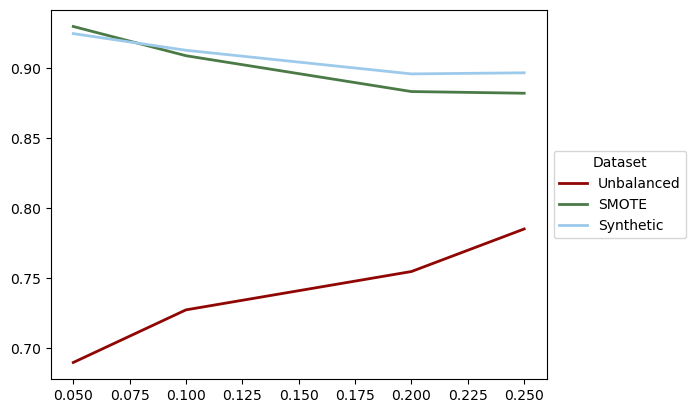

In [49]:
'''
Surgical
RAW DATA
[0.710496850770549, 0.7666791408315122, 0.8673518205679743, 0.755258939169909, 0.8259761310769884] -> 0.7852
[0.669541516046207, 0.7325853126283131, 0.8576917932912371, 0.7164747967928197, 0.7978973097104706] -> 0.7548
[0.6151208899400098, 0.6845574485624548, 0.8353249665608287, 0.7259209965776457, 0.7760955650763771] -> 0.7274
[0.6040905158229999, 0.604591750776977, 0.8005667975435417, 0.6890939741878117, 0.7506253673166446] -> 0.6898
SMOTE DATA
[0.8539621379190254, 0.8700226424398277, 0.8971396608154396, 0.899497322440484, 0.8905721573352763] -> 0.8822
[0.8560955879170606, 0.8709181481435959, 0.8952969379544017, 0.9066532098909363, 0.8877974749939748] -> 0.8834
[0.8856417304877257, 0.8862483196215818, 0.9112623316537558, 0.9485397190989424, 0.9131022732488983] -> 0.909
[0.9221241096231113, 0.9022410651987578, 0.9244186060716604, 0.9615556058923598, 0.9393676858034492] -> 0.9299
Synthetic DATA
[0.8572625397778418, 0.8798993904861325, 0.9093949663454575, 0.9280918525329384, 0.9091039674690599] -> 0.8968
[0.8515695167344427, 0.8794626885070078, 0.9092649014714264, 0.934317282705253, 0.9054436175682504] -> 0.896
[0.8827638258717521, 0.8876189662282089, 0.9193364013144787, 0.955649482790126, 0.9193000390778121] -> 0.9129
[0.919663248317421, 0.8927488825622356, 0.9302393768228445, 0.9446943954704355, 0.9366006466098827] -> 0.9248
'''
raw_surgical = [.7852, 0.7548, 0.7274, 0.6898]
smote_surgical = [.8822, 0.8834, 0.909, 0.9299]
syn_surgical = [.8968, .896, .9129, .9248]

surgical_x_vals = [0.25, 0.2, 0.1, 0.05]


plt.plot(surgical_x_vals, raw_surgical, label='Unbalanced', color='#900603', linewidth=2)
plt.plot(surgical_x_vals, smote_surgical, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(surgical_x_vals, syn_surgical, label='Synthetic', color='#9DCAEB', linewidth=2)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


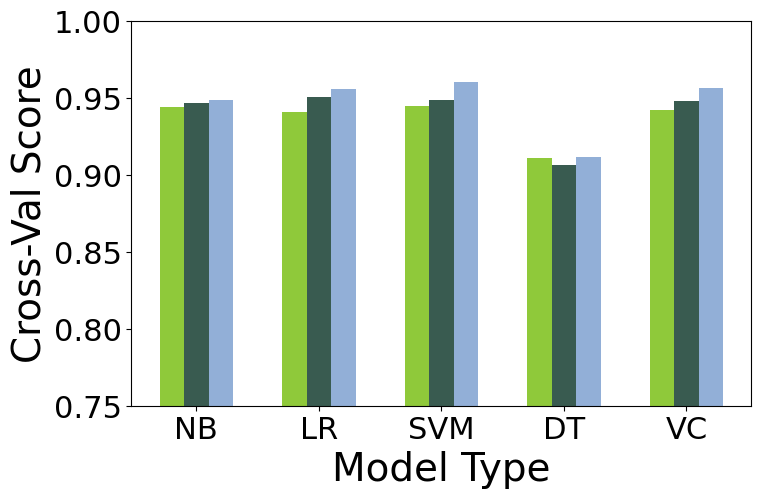

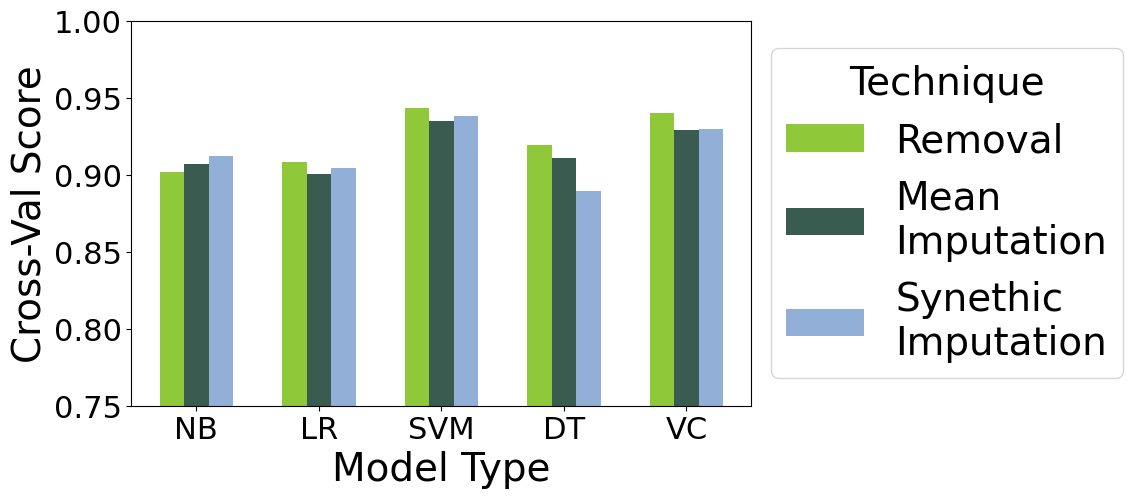

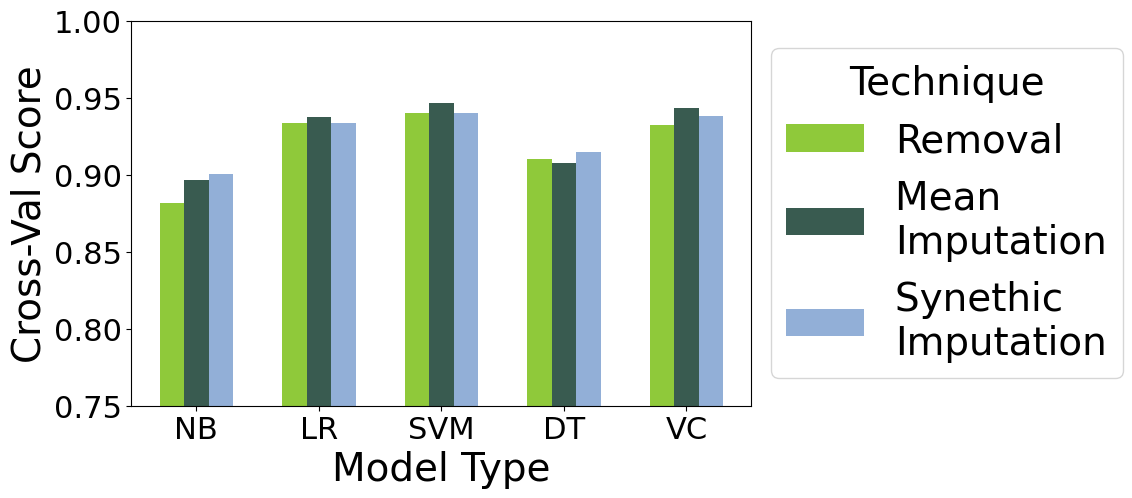

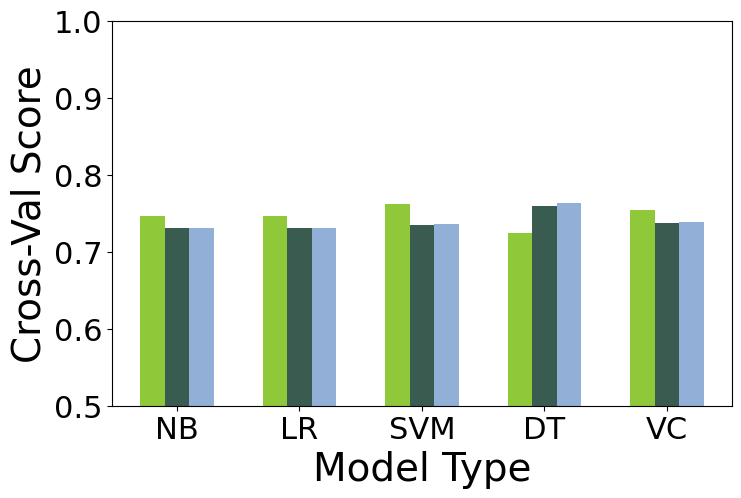

In [59]:
removalColor = '#8FC93A'
meanColor = '#395B50'
synColor = '#92AFD7'

'''
WBC
Removal
----------
NB Mean Scores: 0.9437220502235982
LR Mean Scores: 0.9410633474462994
SVM Mean Scores: 0.9442617177034933
DT Mean Scores: 0.9110067057125881
VC Mean Scores: 0.9410633474462994

Mean
----------
NB Mean Scores: 0.9463244836396096
LR Mean Scores: 0.9505937919179626
SVM Mean Scores: 0.948543910540805
DT Mean Scores: 0.9062578375784478
VC Mean Scores: 0.948189917324647

Synthetic
-----------
NB Mean Scores: 0.9488763379477664
LR Mean Scores: 0.9556940337755722
SVM Mean Scores: 0.960517836490131
DT Mean Scores: 0.9113168711265518
VC Mean Scores: 0.956336933359648


'''
X_vals = ['NB','LR','SVM', 'DT', 'VC']
X_axis = np.arange(len(X_vals))

wbc_remove = [0.9437, 0.9410, 0.9444, 0.9110, 0.9419]
wbc_mean = [0.9463, 0.9505, 0.9485, 0.9062, 0.9481]
wbc_syn = [0.9488, 0.9556, 0.9605, 0.9113, 0.9563]

plt.bar(X_axis - 0.2, wbc_remove, 0.2, label = 'Imbalanced Data', color=removalColor)
plt.bar(X_axis - 0.0, wbc_mean, 0.2, label = 'Smote Data\n(From Imbalanced)', color=meanColor)
plt.bar(X_axis + 0.2, wbc_syn, 0.2, label = 'Synethic Data\n(From Imbalanced)', color=synColor)
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0.75,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.show()


'''
WDBC
Removal
----------
NB Mean Scores: 0.9017788992205009
LR Mean Scores: 0.9082500617970585
SVM Mean Scores: 0.9426678452248531
DT Mean Scores: 0.9192690304962111
VC Mean Scores: 0.9402514257464201

Mean
----------
NB Mean Scores: 0.9069733243142801
LR Mean Scores: 0.9007253611302838
SVM Mean Scores: 0.9351575046243227
DT Mean Scores: 0.9106323260151962
VC Mean Scores: 0.929390181571123

Synthetic
-----------
NB Mean Scores: 0.9122090677629979
LR Mean Scores: 0.9046187739936045
SVM Mean Scores: 0.9380577920850184
DT Mean Scores: 0.889602172894856
VC Mean Scores: 0.9296711815316465
'''
X_vals = ['NB','LR','SVM', 'DT', 'VC']
X_axis = np.arange(len(X_vals))

wdbc_remove = [0.9018, 0.9083, 0.9436, 0.9193, 0.9403]
wdbc_mean = [0.9070, 0.9007, 0.9352, 0.9106, 0.9293]
wdbc_syn = [0.9122, 0.9046, 0.9380, 0.8896, 0.9298]

plt.bar(X_axis - 0.2, wdbc_remove, 0.2, label = 'Removal', color=removalColor)
plt.bar(X_axis - 0.0, wdbc_mean, 0.2, label = 'Mean\nImputation', color=meanColor)
plt.bar(X_axis + 0.2, wdbc_syn, 0.2, label = 'Synethic\nImputation', color=synColor)
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0.75,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.legend(title='Technique',loc='center left', bbox_to_anchor=(1, 0.5))
plt.rc('xtick', labelsize=22) 
plt.show()


'''
WDBC_stripped
Removal
----------
NB Mean Scores: 0.7462946193430818
LR Mean Scores: 0.7466957724550733
SVM Mean Scores: 0.7616462872544084
DT Mean Scores: 0.7243822474896456
VC Mean Scores: 0.7543971839414313

Mean
----------
NB Mean Scores: 0.7304579625168225
LR Mean Scores: 0.7313494406232255
SVM Mean Scores: 0.7351649742017463
DT Mean Scores: 0.758880692262655
VC Mean Scores: 0.737647164359087
Synthetic
-----------
NB Mean Scores: 0.9003118127224765
LR Mean Scores: 0.9334678688677552
SVM Mean Scores: 0.9399831063245696
DT Mean Scores: 0.9148391417620007
VC Mean Scores: 0.9384559125880738
'''
X_vals = ['NB','LR','SVM', 'DT', 'VC']
X_axis = np.arange(len(X_vals))

wdbc_remove_stripped = [0.8814, 0.9333, 0.9403, 0.9101, 0.9323]
wdbc_mean_stripped = [0.8968, 0.9373, 0.9464, 0.9073, 0.9435]
wdbc_syn_stripped = [0.9003, 0.9334, 0.9399, 0.9148, 0.9384]

plt.bar(X_axis - 0.2, wdbc_remove_stripped, 0.2, label = 'Removal', color=removalColor)
plt.bar(X_axis - 0.0, wdbc_mean_stripped, 0.2, label = 'Mean \nImputation', color=meanColor)
plt.bar(X_axis + 0.2, wdbc_syn_stripped, 0.2, label = 'Synethic \nImputation', color=synColor)
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0.75,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.legend(title='Technique',loc='center left', bbox_to_anchor=(1, 0.5))
plt.rc('xtick', labelsize=22) 
plt.show()



'''
Surgical
Removal
----------
NB Mean Scores: 0.7462946193430818
LR Mean Scores: 0.7466957724550733
SVM Mean Scores: 0.7616462872544084
DT Mean Scores: 0.7243822474896456
VC Mean Scores: 0.7543971839414313

Mean
----------
NB Mean Scores: 0.7304579625168225
LR Mean Scores: 0.7313494406232255
SVM Mean Scores: 0.7351649742017463
DT Mean Scores: 0.758880692262655
VC Mean Scores: 0.737647164359087

Synthetic
-----------
NB Mean Scores: 0.7312878688942299
LR Mean Scores: 0.7312828271144254
SVM Mean Scores: 0.7361618306772325
DT Mean Scores: 0.7633688378805366
VC Mean Scores: 0.7391380151857192
'''
X_vals = ['NB','LR','SVM', 'DT', 'VC']
X_axis = np.arange(len(X_vals))

surgical_remove = [0.7463, 0.7466, 0.7616, 0.7244, 0.7543]
surgical_mean = [0.7304, 0.7313, 0.7351, 0.7588, 0.7376]
surgical_syn = [0.7313, 0.7313, 0.7362, 0.7633, 0.7391]

plt.bar(X_axis - 0.2, surgical_remove, 0.2, label = 'Removed Data', color=removalColor)
plt.bar(X_axis - 0.0, surgical_mean, 0.2, label = 'Smote Data\n(From Imbalanced)', color=meanColor)
plt.bar(X_axis + 0.2, surgical_syn, 0.2, label = 'Synethic Data\n(From Imbalanced)', color=synColor)
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0.50,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=22) 
plt.show()
